<a href="https://colab.research.google.com/github/Amin-Lotfian/Python-project-excercises-and-projects/blob/main/23_second_project_skills_trend_(pivot_%2B_Explode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
!pip install datasets
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
id(df)

139352230397024

In [ ]:
df['job_title_short'].isnull().sum()

0

In [ ]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


first solution for sorting based on months

In [ ]:
# df['job_posted_month']=df['job_posted_date'].dt.strftime('%B')
# df['job_posted_month2']=df['job_posted_date'].dt.month


# df.reset_index(drop=True, inplace=True) # we use drop=True to ensure that the existing index is dropped and not added as a new column
# df.set_index('job_posted_month2', inplace=True)
# df.sort_index(inplace=True)
# df.reset_index(drop=True, inplace=True) # we dont need to drop 'job_posted_month2' because it is already dropped when we reseted index with drop=true
# # no need tp drop: df.drop('job_posted_month2', axis=1, inplace=True)
# df.index


second solution for sorting based on months

In [ ]:
df['job_posted_month']=df['job_posted_date'].dt.strftime('%B')
df['job_posted_month2']=df['job_posted_date'].dt.month


df.sort_values(by=['job_posted_month2'], inplace=True)
df.reset_index(drop=True, inplace=True) # we use drop=True to ensure that the existing index is dropped and not added as a new column

pivot_table is itself a DataFrame


In [ ]:
top_5 = df.explode('job_skills')['job_skills'].value_counts().head().index.tolist()

df_da_ireland = df[(df['job_title_short'] == 'Data Analyst') & (df['job_location'] == 'Ireland')] # filtering
df_da_ireland1 = df_da_ireland.explode('job_skills').reset_index(drop=True) #explode
df_da_ireland2= df_da_ireland1.pivot_table(
    index='job_posted_month2',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
    ) # pivot

df_da_ireland2[top_5].plot(kind='line')
plt.show()
df_da_ireland2

In [ ]:
# adding a new row that is the sum of first five rows

# df.loc['Total'] = df.loc[0:4].sum()


TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'

In [ ]:
# type(df_da_ireland2.sum())

In [ ]:
df_da_ireland2

job_skills,alteryx,ansible,aws,azure,bash,bigquery,c,c#,cognos,crystal,...,ssis,ssrs,swift,t-sql,tableau,unity,unix,vba,visio,word
job_posted_month2,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,4,0,0,1,0,0,0,...,1,1,0,1,13,0,0,0,2,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,1,2,0,0,0,1,0,0,...,0,1,0,0,4,0,0,0,0,1
4,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2
5,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,1,1,1
6,1,0,3,4,0,0,0,0,2,1,...,2,2,0,0,12,0,1,3,0,4
7,1,0,1,2,0,0,0,0,3,2,...,0,1,0,0,5,0,0,2,1,4
8,1,0,0,1,0,0,0,0,0,0,...,2,1,0,0,4,0,2,4,1,4
9,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,1


In [ ]:
df_da_ireland = df[(df['job_title_short'] == 'Data Analyst') & (df['job_location'] == 'Ireland')] #filtering
df_da_ireland1 = df_da_ireland.explode('job_skills').reset_index(drop=True) # explode
df_da_ireland2= df_da_ireland1.pivot_table(
    index='job_posted_month2', # اقااااا نکته اینجا داری ایندکس رو معلوم میکنی هاااا
    columns='job_skills',
    aggfunc='size',
    fill_value=0
    ) #pivot

df_da_ireland2.loc['Total']= df_da_ireland2.sum()
list_total = df_da_ireland2.loc['Total'].sort_values(ascending=False).index # اینجا میایم لیست مرتب شده ی اسکیل رو پیدا میکنیم
print(list_total[:5])
df_da_Ireland2 = df_da_ireland2[list_total] # اینجا میایم کل دیتا فریم رو بر حسب لیست مرتب شده میچینیم
# df_da_Ireland2 = df_da_ireland2.loc[:, list_total] # This uses .loc to select all rows (:) and columns specified in list_total. This rearranges the columns of df_da_Ireland_pivot to match the order in list_total.



# Now we want to drop row 'Total' from df_da_Ireland2
# آقاااااااااا نکته ی کل این بخش این بود که دراپ هیچ وقت روی ایندکس کار نمیکنه
# df_da_ireland2.drop('Total',axis=0, inplace=True) # i dont know why, but the drop doesnt work at all. doesnt work.
# df_da_Ireland2 = df_da_Ireland2[df_da_Ireland2.index != 'Total'] # this also doesnt work


df_da_Ireland2


Index(['sql', 'excel', 'tableau', 'power bi', 'python'], dtype='object', name='job_skills')


job_skills,sql,excel,tableau,power bi,python,r,sas,word,powerpoint,sql server,...,docker,spring,pandas,splunk,c#,planner,postgresql,scikit-learn,puppet,ansible
job_posted_month2,,,,,,,,,,,,,,,,,,,,,
1,19,11,13,9,10,5,12,1,0,4,...,0,1,0,0,0,1,0,0,0,0
2,3,4,1,1,2,2,4,1,3,0,...,0,0,0,0,0,0,0,0,0,0
3,8,5,4,2,6,4,4,1,2,0,...,0,0,1,0,1,0,0,1,0,0
4,6,5,2,2,2,1,2,2,1,1,...,0,0,0,1,0,0,0,0,0,0
5,5,6,2,4,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,15,16,12,7,9,5,2,4,6,0,...,1,0,0,0,0,0,0,0,0,0
7,17,11,5,11,7,6,0,4,4,3,...,0,0,0,0,0,0,0,0,0,0
8,9,11,4,3,4,3,2,4,2,3,...,0,0,0,0,0,0,0,0,0,0
9,7,5,2,4,4,2,0,1,0,1,...,0,0,0,0,0,0,1,0,1,1


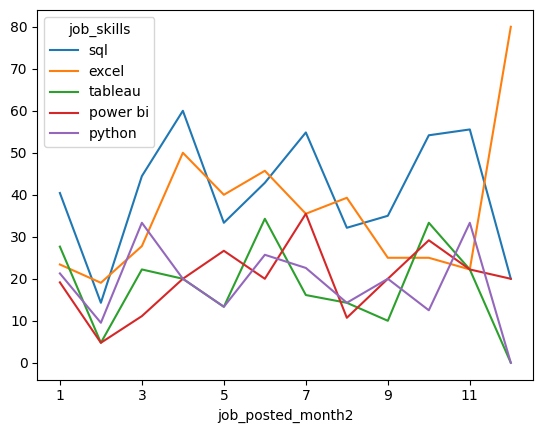

job_skills,sql,excel,tableau,power bi,python,r,sas,word,powerpoint,sql server,...,docker,spring,pandas,splunk,c#,planner,postgresql,scikit-learn,puppet,ansible
job_posted_month2,,,,,,,,,,,,,,,,,,,,,
1,40.425532,23.404255,27.659574,19.148936,21.276596,10.638298,25.531915,2.127660,0.000000,8.510638,...,0.000000,2.12766,0.000000,0.0,0.000000,2.12766,0.0,0.000000,0.0,0.0
2,14.285714,19.047619,4.761905,4.761905,9.523810,9.523810,19.047619,4.761905,14.285714,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
3,44.444444,27.777778,22.222222,11.111111,33.333333,22.222222,22.222222,5.555556,11.111111,0.000000,...,0.000000,0.00000,5.555556,0.0,5.555556,0.00000,0.0,5.555556,0.0,0.0
4,60.000000,50.000000,20.000000,20.000000,20.000000,10.000000,20.000000,20.000000,10.000000,10.000000,...,0.000000,0.00000,0.000000,10.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
5,33.333333,40.000000,13.333333,26.666667,13.333333,0.000000,0.000000,6.666667,6.666667,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
6,42.857143,45.714286,34.285714,20.000000,25.714286,14.285714,5.714286,11.428571,17.142857,0.000000,...,2.857143,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
7,54.838710,35.483871,16.129032,35.483871,22.580645,19.354839,0.000000,12.903226,12.903226,9.677419,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
8,32.142857,39.285714,14.285714,10.714286,14.285714,10.714286,7.142857,14.285714,7.142857,10.714286,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
9,35.000000,25.000000,10.000000,20.000000,20.000000,10.000000,0.000000,5.000000,0.000000,5.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,5.0,0.000000,5.0,5.0


In [ ]:
DA_totals = df_da_ireland.groupby('job_posted_month2').size()
df_da_Ireland_percent = df_da_Ireland2.div(DA_totals/100, axis=0)
df_da_Ireland_percent.iloc[:,:5].plot(kind='line')
plt.show()
df_da_Ireland_percent


adding a column which is total of all rows

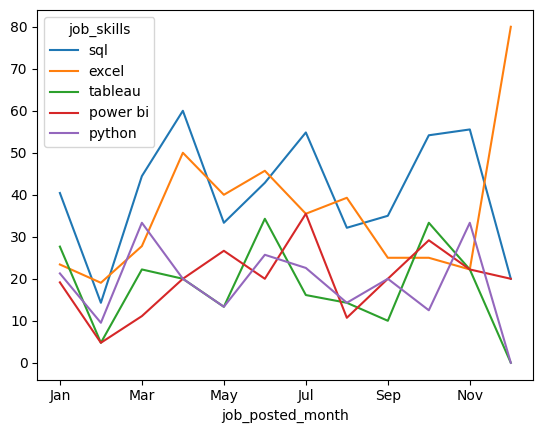

job_skills,sql,excel,tableau,power bi,python,r,sas,word,powerpoint,sql server,...,docker,spring,pandas,splunk,c#,planner,postgresql,scikit-learn,puppet,ansible
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,40.425532,23.404255,27.659574,19.148936,21.276596,10.638298,25.531915,2.127660,0.000000,8.510638,...,0.000000,2.12766,0.000000,0.0,0.000000,2.12766,0.0,0.000000,0.0,0.0
Feb,14.285714,19.047619,4.761905,4.761905,9.523810,9.523810,19.047619,4.761905,14.285714,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
Mar,44.444444,27.777778,22.222222,11.111111,33.333333,22.222222,22.222222,5.555556,11.111111,0.000000,...,0.000000,0.00000,5.555556,0.0,5.555556,0.00000,0.0,5.555556,0.0,0.0
Apr,60.000000,50.000000,20.000000,20.000000,20.000000,10.000000,20.000000,20.000000,10.000000,10.000000,...,0.000000,0.00000,0.000000,10.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
May,33.333333,40.000000,13.333333,26.666667,13.333333,0.000000,0.000000,6.666667,6.666667,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
Jun,42.857143,45.714286,34.285714,20.000000,25.714286,14.285714,5.714286,11.428571,17.142857,0.000000,...,2.857143,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
Jul,54.838710,35.483871,16.129032,35.483871,22.580645,19.354839,0.000000,12.903226,12.903226,9.677419,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
Aug,32.142857,39.285714,14.285714,10.714286,14.285714,10.714286,7.142857,14.285714,7.142857,10.714286,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0
Sep,35.000000,25.000000,10.000000,20.000000,20.000000,10.000000,0.000000,5.000000,0.000000,5.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,5.0,0.000000,5.0,5.0


In [ ]:
df_da_Ireland_percent = df_da_Ireland_percent.reset_index()
df_da_Ireland_percent = df_da_Ireland_percent[df_da_Ireland_percent['job_posted_month2'] != 'Total']
df_da_Ireland_percent['job_posted_month'] = df_da_Ireland_percent['job_posted_month2'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_Ireland_percent = df_da_Ireland_percent.set_index('job_posted_month')
df_da_Ireland_percent = df_da_Ireland_percent.drop(columns='job_posted_month2')
df_da_Ireland_percent.iloc[:,:5].plot(kind='line')
plt.show()
df_da_Ireland_percent